# **CVPS20 // Multi-Layer Perceptron Example**

*October 20, 2020*

This notebook will work through an example of using a Multi-Layer Perceptron to classify hand written digits.

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

### Supervised Learning: Hand-written Digit Recognition with MLPs

Load the hand-written digits data,

In [6]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.v2.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- create features array [NOTE THE .copy()]
nimg = nums.shape[0]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

# -- set the target
targ = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2),
                       np.full(500, 3), np.full(500, 4), np.full(500, 5),
                       np.full(500, 6), np.full(500, 7), np.full(500, 8),
                       np.full(500, 9)))

Let's first train a **decision tree classifier** for comparison,

In [7]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size = 0.2, random_state = 302)

In [8]:
# -- instantiate the Decision Tree Classifier model
dtc = DecisionTreeClassifier(min_samples_leaf=10)

# -- fit the model to the training data
dtc.fit(feat_tr, targ_tr)

# -- predict the training and testing sets
pred_tr = dtc.predict(feat_tr)
pred_te = dtc.predict(feat_te)

# -- print the accuracy on the training and testing set
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.8625
testing accuracy : 0.775


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.92      0.93      0.93        92
           2       0.56      0.69      0.62        98
           3       0.68      0.76      0.72        95
           4       0.87      0.88      0.87       110
           5       0.83      0.58      0.68        93
           6       0.88      0.88      0.88       106
           7       0.71      0.74      0.72        91
           8       0.70      0.69      0.69       102
           9       0.74      0.63      0.68       104

    accuracy                           0.78      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.78      0.77      1000



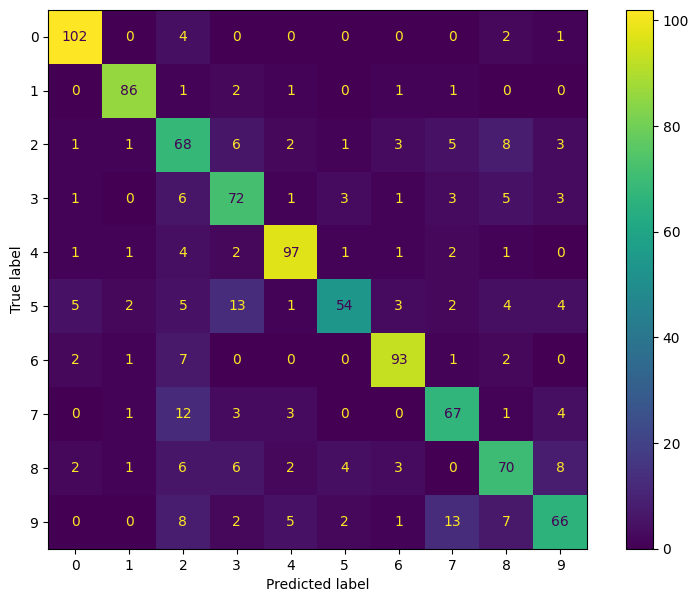

In [14]:
# -- evaluate performance metrics
# ConfusionMatrixDisplay.from_estimator(dtc, feat_te, targ_te)
ConfusionMatrixDisplay.from_predictions(targ_te, pred_te)
print(classification_report(targ_te, pred_te))

Now let's train a **Multi-layer Perceptron classifier**,

In [25]:
# -- instantiate an MLP classifier
mlp = MLPClassifier((15))

In [26]:
# -- train it
mlp.fit(feat_tr, targ_tr)

MLPClassifier(hidden_layer_sizes=100)

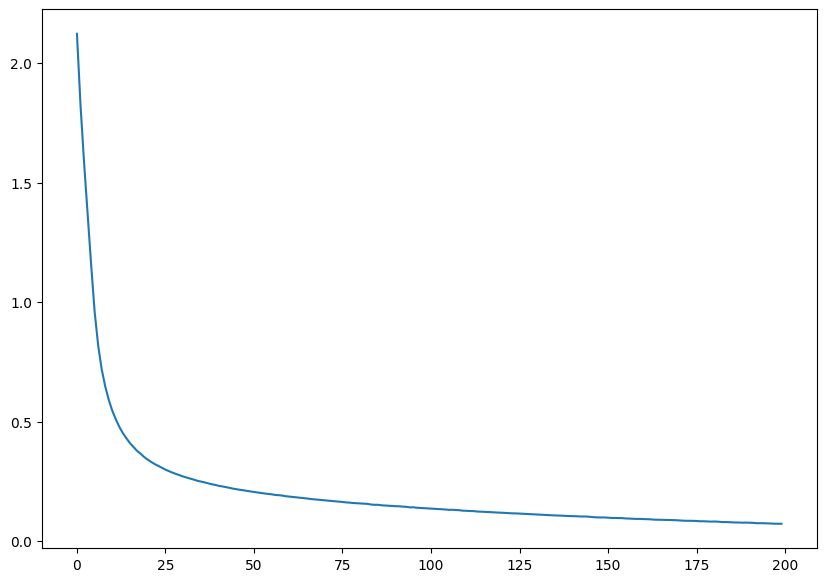

In [17]:
# -- plot the loss function
plt.plot(mlp.loss_curve_)

In [18]:
# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)


In [19]:
# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.987
testing accuracy : 0.901


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       109
           1       0.98      0.96      0.97        92
           2       0.90      0.87      0.89        98
           3       0.89      0.89      0.89        95
           4       0.90      0.93      0.91       110
           5       0.78      0.85      0.81        93
           6       0.92      0.94      0.93       106
           7       0.90      0.91      0.91        91
           8       0.89      0.84      0.86       102
           9       0.90      0.88      0.89       104

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



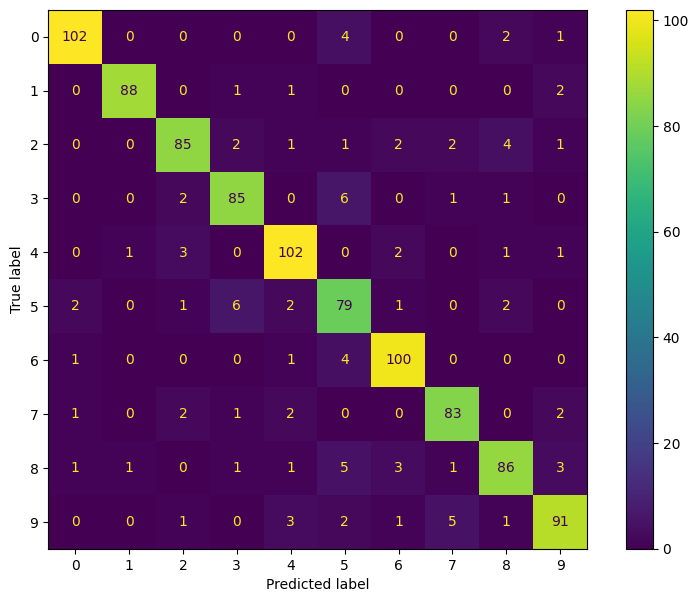

In [20]:
ConfusionMatrixDisplay.from_predictions(targ_te, pred_te)
print(classification_report(targ_te, pred_te))